In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
site_group = '5e-4_qval'
in_dir = '../../MBC/ATAC_nucleosome_profiling/analysis/logreg_results/'


In [3]:
coef_df = pd.read_csv(in_dir+'/'+site_group+'_logreg_results/'+site_group+'.coefs.txt', sep='\t')
coef_df = coef_df.set_index('Unnamed: 0')

In [4]:
coef_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
central_coverage_ER_neg_heme.5e-4_qval,-0.33828,-0.08769,0.00371,0.09315,-0.15819,0.00474,0.00029,0.28256,0.55488,-0.00276,...,0.19719,0.18828,0.34760,0.62405,0.02317,-0.01931,0.08985,-0.18885,0.02832,0.12389
mean_coverage_ER_neg_heme.5e-4_qval,-0.04597,0.13219,0.20792,0.32096,-0.26812,0.00652,0.00030,-0.16232,0.39465,0.54318,...,0.22064,0.53898,0.05265,0.16596,0.03942,0.47672,0.10017,0.11542,-0.01622,-0.09652
amplitude_ER_neg_heme.5e-4_qval,0.36833,0.16340,-0.00538,0.19247,0.14176,0.00074,-0.00005,0.08006,-0.03297,0.10397,...,0.08608,-0.00111,0.58074,0.57357,0.01406,0.19523,0.11535,0.75737,0.79494,0.22253
central_coverage_ER_pos_heme.5e-4_qval,0.58496,0.27752,0.56690,-0.00577,-0.06892,-0.00581,-0.00039,0.08254,0.65187,0.17952,...,0.05895,0.09718,0.27113,0.18232,-0.04181,-0.08940,-0.02565,0.20376,0.02881,0.34920
mean_coverage_ER_pos_heme.5e-4_qval,-0.59009,-1.12497,-0.80090,-0.56889,-1.07455,-0.00658,-0.00050,-0.90125,-0.88826,-0.46320,...,-0.59809,-0.63018,-0.83631,-0.90393,-0.04281,-0.33554,-0.19573,-0.72679,-0.58967,-0.89815
amplitude_ER_pos_heme.5e-4_qval,0.15579,-0.40115,-0.12714,-0.08693,0.03629,0.00511,0.00015,0.18968,-0.10440,0.17200,...,0.31017,-0.04206,-0.51386,-0.20339,0.03431,0.33284,0.08095,-0.03370,0.03368,0.03276
central_coverage_ER_pos_specific.5e-4_qval,-0.70014,-0.26772,-0.30254,-0.13269,-0.41295,-0.00630,-0.00051,0.00107,-0.70667,-0.54373,...,-0.08903,-0.36141,-0.57808,-0.48313,-0.04997,-0.13325,-0.13930,-0.11647,0.43752,-0.17660
mean_coverage_ER_pos_specific.5e-4_qval,-0.98620,-0.82087,-1.25049,-0.69773,-0.62210,-0.00668,-0.00058,-1.05010,-1.33450,-0.29406,...,-0.38155,-0.56415,-0.39363,-1.02967,-0.05319,-1.02922,-0.20942,-1.39608,-1.74328,-1.11823
amplitude_ER_pos_specific.5e-4_qval,0.31822,0.69615,-0.01687,0.08749,0.39367,0.00394,0.00026,0.13727,-0.21596,0.09916,...,0.20164,0.18710,0.27334,0.82862,0.03402,0.18885,0.05185,0.01561,-0.07659,-0.00847


In [5]:
features = coef_df.index
features = np.sort(features)
features = pd.Series(features)

#sort into desired order
features = features[features.str.contains('ER_pos_specific')].append(features[features.str.contains('ER_pos_heme')]).append(features[features.str.contains('ER_neg_specific')]).append(features[features.str.contains('ER_neg_heme')])
features = features[features.str.contains('central_cov')].append(features[features.str.contains('mean_cov')]).append(features[features.str.contains('amplitude')]).values
features = np.flip(features)
print(len(features))

12


In [6]:
# iterations = coef_df.columns.drop(['mean_coef','abs_coef'])
iterations = [str(m) for m in np.arange(1000)]

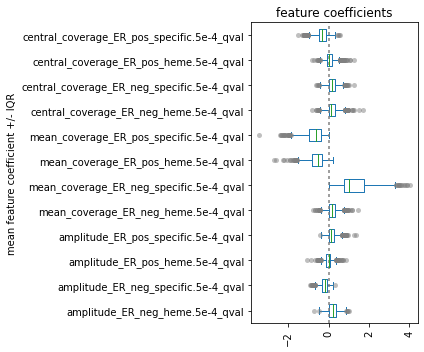

In [7]:
#plot the coefficients
fig,ax = plt.subplots(figsize = (6,5))

flierprops = {'marker':'.','markersize':10,'alpha':.5,'markerfacecolor':'grey','markeredgecolor':'none'}
coef_df[iterations].loc[features].T.plot.box(ax = ax,  vert = False, flierprops = flierprops)
ax.set_title('feature coefficients')

ax.tick_params(axis = 'x', labelrotation=90)
ax.axvline(x=0, color = 'grey', dashes = [2,2])

ax.set_ylabel('mean feature coefficient +/- IQR')

fig.tight_layout()
fig.savefig('plots/ATAC_feature_coefficients.pdf')
plt.show()